Chapter 16

# 中心极限定理
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码模拟了掷骰子的实验，用来展示大数法则和中心极限定理的效果。

1. **设置参数**：
   - 设定投掷的骰子数量为 $n=20$，每次实验掷 $20$ 次骰子，并计算每次掷出数值的均值。
   - 重复投掷实验 $10,000$ 次（总实验次数为 `num_trials=10000`），从而生成均值的分布。

2. **生成均值数据**：
   - 每次试验生成一个 $20$ 个元素的数组，其中每个元素是从 $1$ 到 $6$ 的随机整数，这表示一个骰子的可能面值。
   - 对每次试验的结果取平均，得到 $n=20$ 次骰子的均值 $X_i = \frac{1}{n} \sum_{j=1}^n X_{ij}$，将这些均值存储到 `mean_array` 列表中。

3. **绘制均值分布的直方图**：
   - 选择不同的实验次数 $m = 100, 1000, 10000$，分别绘制前 $100$ 次、$1000$ 次、$10000$ 次实验的均值分布直方图。
   - 使用核密度估计（KDE）来估计均值分布的概率密度函数。
   
4. **均值和标准差**：
   - 计算 `mean_array_j`（前 $j$ 次实验的均值数据）的样本均值 $\mu_{\bar{X}}$ 和样本标准差 $\sigma_{\bar{X}}$。
   - 绘制均值所在位置的垂直线，以及加减一个标准差 $\pm \sigma_{\bar{X}}$ 的位置，以显示分布的集中趋势。
   
5. **结果和中心极限定理的验证**：
   - 中心极限定理表明，随着试验次数 $m$ 增加，骰子均值的分布会逐渐接近正态分布。通过绘制不同试验次数的直方图，可以观察到分布逐渐集中并趋于对称的形状，体现均值分布向正态分布收敛的趋势。

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 初始化参数

In [2]:
mean_array = []  # 存储每次实验的均值
num_dices  = 20  # 骰子数量
num_trials = 10000  # 实验次数

## 进行每次实验：投掷骰子并计算均值

In [3]:
for i in np.arange(num_trials):  # 遍历每次实验
    sample_i = np.random.randint(low=1, high=6 + 1, size=(num_dices))  # 随机投掷指定数量的骰子
    mean_i = sample_i.mean()  # 计算每次投掷的均值
    mean_array.append(mean_i)  # 将均值存入列表

## 绘制均值的直方图，观察不同实验次数下的分布情况

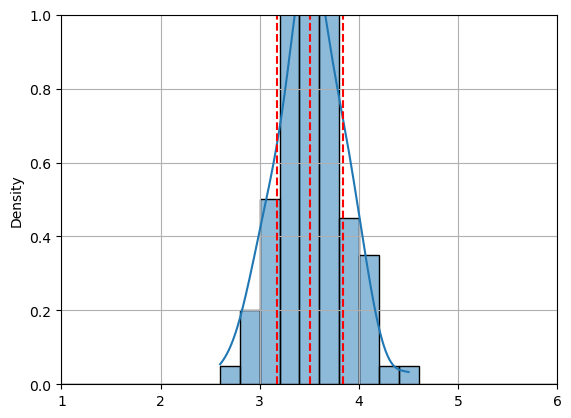

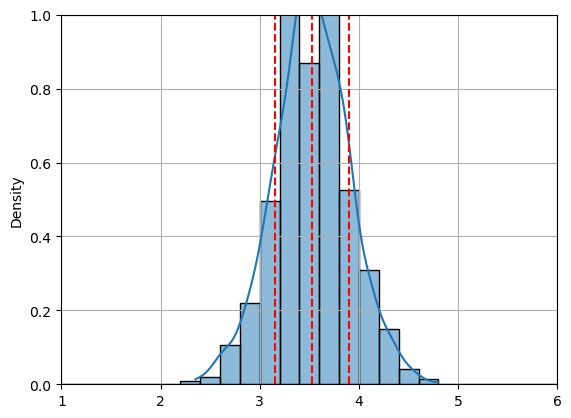

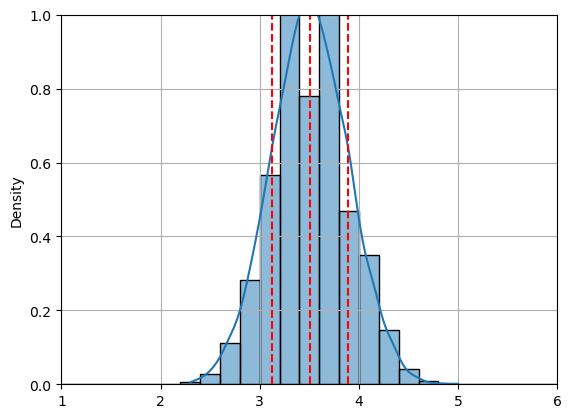

In [4]:
for j in [100, 1000, 10000]:  # 设置不同的实验次数
    
    mean_array_j = mean_array[0:j]  
    # 获取当前实验次数对应的均值数组
    
    fig, ax = plt.subplots()  # 创建图表
    
    sns.histplot(mean_array_j, kde=True, stat="density",  # 绘制直方图
                 binrange=[1, 6], binwidth=0.2)
    
    mean_array_j = np.array(mean_array_j)  
    # 转换为数组形式以便计算均值和标准差
    
    mu_mean_array_j = mean_array_j.mean() 
    # 计算均值
    
    ax.axvline(x=mu_mean_array_j, color='r', linestyle='--')  
    # 绘制均值的垂直线
    
    sigma_mean_array_j = mean_array_j.std()  
    # 计算标准差
    
    ax.axvline(x=mu_mean_array_j + sigma_mean_array_j,
               color='r', linestyle='--')  
    # 绘制均值+标准差的垂直线
    
    ax.axvline(x=mu_mean_array_j - sigma_mean_array_j, 
               color='r', linestyle='--')  
    # 绘制均值-标准差的垂直线
    
    plt.xlim(1, 6)  # 设置x轴范围
    plt.ylim(0, 1)  # 设置y轴范围
    plt.grid()  # 显示网格